# ANN CLASSIFICATION - {"CUSTOMER CHURN" DATASET}

## 1. Importing Modules and Setting Configurations

In [1]:
import numpy as np
import tensorflow as tf
import random as rn

In [2]:
import os
os.environ['PYTHONHASHSEED'] = '0'
rn.seed(1254)
np.random.seed(37)
tf.random.set_seed(89)

# from keras import backend as K
# session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
# sess = tf.Session(graph = tf.get_default_graph(), config=session_conf)
# K.set_session(sess)

tf.compat.v1.set_random_seed(12)
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

# tf.keras.utils.set_random_seed(1)
# tf.config.experimental.enable_op_determinism()

In [3]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from keras.layers import Dense, Dropout

import keras_tuner as kt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from pickle import dump, load

import warnings
warnings.filterwarnings('ignore')

from sklearn import set_config
set_config(display='diagram')

In [4]:
# PD Options

pd.set_option('display.min_rows', 5)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 4)

In [5]:
# SB Options

sb.set_theme(context='notebook', style='whitegrid', palette='pastel', font='times new roman', font_scale=1.25)

## 2. Importing Dataset

### 2.1 Train Dataset

In [6]:
tr = pd.read_pickle('cc_train_fe.pkl')


print(f'Shape of the train dataset : {tr.shape}')
tr.head(5)

Shape of the train dataset : (6960, 70)


,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,churn
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.1465,0.1024,-0.3034,-0.0452,-0.0456,-0.9278,-0.9282,1.0174,1.0155,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.1349,1.2493,-1.5019,0.7618,0.7619,0.9893,0.9899,-0.1726,-0.1727,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.5194,-1.4436,-0.3034,-1.1638,-1.1640,-0.0775,-0.0765,-0.8682,-0.8695,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.4219,-0.9316,-0.3034,1.3034,1.3031,-0.2460,-0.2464,-1.6139,-1.6154,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.5194,1.3354,-0.3034,0.8415,0.8416,0.1350,0.1358,-0.6571,-0.6551,0


In [7]:
Xtr = tr.drop(columns='churn')
ytr = tr['churn']

In [8]:
Xtr = tensorflow.convert_to_tensor(Xtr, dtype = tensorflow.float32)

In [9]:
Xtr

<tf.Tensor: shape=(6960, 69), dtype=float32, numpy=
array([[ 0.        ,  0.        ,  0.        , ..., -0.9282404 ,
         1.0173703 ,  1.0154524 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.98988664,
        -0.17264657, -0.17268398],
       [ 0.        ,  0.        ,  0.        , ..., -0.07652593,
        -0.8681632 , -0.8694858 ],
       ...,
       [ 0.5253647 ,  0.        ,  0.        , ...,  0.7367721 ,
         0.7039608 ,  0.7060876 ],
       [ 0.        ,  0.        ,  0.        , ...,  2.0005934 ,
         0.08957304,  0.09115531],
       [ 0.        ,  0.        ,  0.        , ..., -0.5081341 ,
         0.0599156 ,  0.05990292]], dtype=float32)>

### 2.2 Validation Dataset

In [10]:
val = pd.read_pickle('cc_valid_fe.pkl')

print(f'Shape of the train dataset : {val.shape}')
val.head(5)

Shape of the train dataset : (100, 70)


,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,churn
0,0,0,0,0,0,0,0,0,0,0,...,-0.0125,1.1777,-1.5019,-1.3307,-1.331,0.125,0.124,-1.4933,-1.4948,0
1,0,0,0,0,0,0,0,0,0,0,...,0.4219,0.5662,-0.3034,-0.3513,-0.3511,-0.7333,-0.7324,-0.9526,-0.9544,0
2,0,0,0,0,0,0,0,0,0,0,...,-1.1349,-0.6725,-0.3034,-0.3884,-0.3882,0.1972,0.1972,-0.5666,-0.5658,0
3,0,0,1,0,0,0,0,0,0,0,...,-0.0125,0.0744,0.573,0.7506,0.751,-0.8817,-0.8811,-0.2551,-0.2531,0
4,0,0,0,0,0,0,0,0,0,0,...,-0.0125,0.4533,-0.3034,-0.0452,-0.0456,-0.5027,-0.5036,-0.7898,-0.7891,0


In [11]:
Xval = val.drop(columns='churn')
yval = val['churn']

In [12]:
Xval = tensorflow.convert_to_tensor(Xval, dtype = tensorflow.float32)

In [13]:
Xval

<tf.Tensor: shape=(100, 69), dtype=float32, numpy=
array([[ 0.        ,  0.        ,  0.        , ...,  0.12401625,
        -1.4933242 , -1.4948207 ],
       [ 0.        ,  0.        ,  0.        , ..., -0.73241687,
        -0.9525901 , -0.9543527 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.19715516,
        -0.56663865, -0.5657517 ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.24670088,
         0.2836606 ,  0.2829172 ],
       [ 0.        ,  0.        ,  0.        , ...,  2.9504814 ,
         0.91284186,  0.91271883],
       [ 0.        ,  0.        ,  0.        , ..., -1.8719684 ,
        -0.4440187 , -0.44515136]], dtype=float32)>

## 3. Hyper-Parameter Tuning for Best Model

### 3.1 Model

In [14]:
def build_model(hp):
    
    model = Sequential()
    cntr = 0
    
    for i in range(hp.Int('num_layers', min_value=1, max_value=2)):
        if cntr == 0:
            model.add(Dense(units=hp.Int('num_nodes '+str(i), min_value=8, max_value=70, step=8), 
                            activation=hp.Choice('act_func '+str(i), values=['relu','tanh','linear']),
                            input_dim=69))
            model.add(Dropout(hp.Choice('dropout '+str(i), values=[0.1,0.2,0.3,0.4,0.5])))
        else:
            model.add(Dense(units=hp.Int('num_nodes '+str(i), min_value=8, max_value=70, step=8), 
                            activation=hp.Choice('act_func '+str(i), values=['relu','tanh','linear'])))
            model.add(Dropout(hp.Choice('dropout '+str(i), values=[0.1,0.2,0.3,0.4,0.5])))
            
        cntr=cntr+1
    
    model.add(Dense(1, activation='sigmoid'))
    
    optimizer = hp.Choice('optimizer', values=['adam','rmsprop','nadam','adamax','sgd'])
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    #hp_learning_rate = hp.Choice('learning_rate', values=[0.001, 0.005, 0.01, 0.05, 0.1])
    #model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate), metrics=['accuracy'])
    
    return model

In [15]:
tnr = kt.RandomSearch(build_model, max_trials=10, objective='val_accuracy',
                     overwrite=True, directory="my_dir", project_name="ccp_ANN",)

In [16]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)

In [17]:
tnr.search(Xtr,ytr, epochs=10, validation_split=0.1)
#tnr.search(Xtr,ytr, epochs=10, validation_split=0.1, callbacks=[stop_early])

Trial 10 Complete [00h 00m 12s]
val_accuracy: 0.7715517282485962

Best val_accuracy So Far: 0.9008620977401733
Total elapsed time: 00h 02m 18s


### 3.2 Best Params

In [18]:
best_params = tnr.get_best_hyperparameters()[0].values

In [19]:
best_params

{'num_layers': 2,
 'num_nodes 0': 40,
 'act_func 0': 'relu',
 'dropout 0': 0.3,
 'optimizer': 'adam',
 'num_nodes 1': 32,
 'act_func 1': 'tanh',
 'dropout 1': 0.2}

### 3.3 Best Model

In [20]:
best_mdl = tnr.get_best_models(num_models=1)[0]

In [21]:
best_mdl.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                2800      
                                                                 
 dropout (Dropout)           (None, 40)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1312      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,145
Trainable params: 4,145
Non-trainable params: 0
_________________________________________________________________


### 3.4 Model Training

In [22]:
hst = best_mdl.fit(Xtr, ytr, epochs=40, initial_epoch=10, verbose=0, validation_split=0.1)
#hst = best_mdl.fit(Xtr, ytr, epochs=40, initial_epoch=10, verbose=1, validation_split=0.1, callbacks=[stop_early])
#hst = best_mdl.fit(Xtr, ytr, epochs=28, initial_epoch=10, verbose=1, validation_data=(Xval,yval))

## 4. Model Evaluation On Train and Test Data

### 4.1 Model Training History

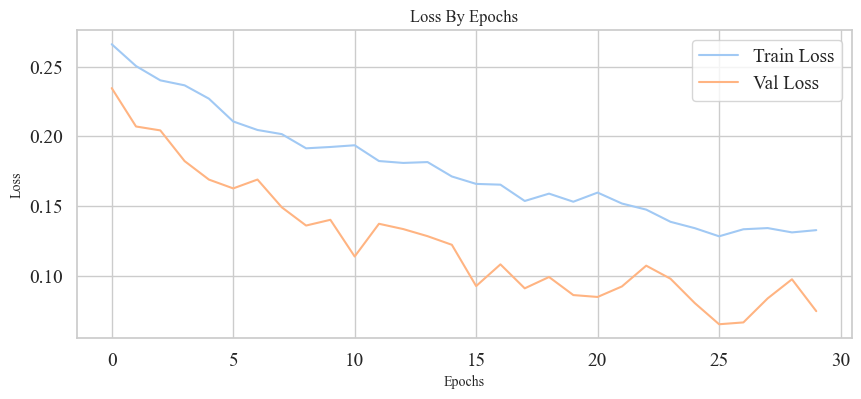

In [23]:
plt.figure(figsize=(10,4))

plt.plot(hst.history['loss'])
plt.plot(hst.history['val_loss'])

plt.title('Loss By Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=10)
plt.xlabel('Epochs',fontsize=10)
plt.legend(['Train Loss','Val Loss'])

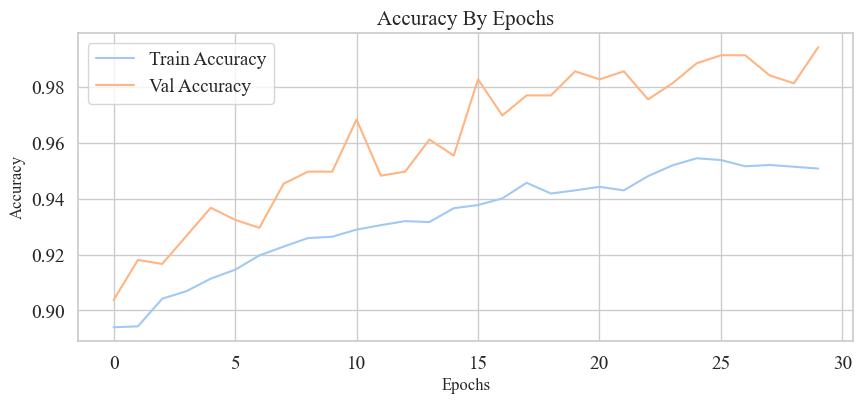

In [24]:
plt.figure(figsize=(10,4))

plt.plot(hst.history['accuracy'])
plt.plot(hst.history['val_accuracy'])

plt.title('Accuracy By Epochs',fontsize=15)
plt.ylabel('Accuracy',fontsize=12)
plt.xlabel('Epochs',fontsize=12)
plt.legend(['Train Accuracy','Val Accuracy'])

### 4.2 Model Evaluation on Training and Validation Dataset

In [25]:
yhat_tr = best_mdl.predict(Xtr)
yhat_val = best_mdl.predict(Xval)

yhat_tr = np.where(yhat_tr > 0.5,1,0)
yhat_val = np.where(yhat_val > 0.5,1,0)

print('\n')
print(f'Train Dataset Accuracy : {round(accuracy_score(ytr,yhat_tr)*100,4)} %')

pred_val = [yhat_val[x][0] for x in range(yhat_val.shape[0])]
print(f'Validation Dataset Accuracy : {round(accuracy_score(yval.tolist(),pred_val)*100,4)} %')

4/4 [==============================] - 0s 6ms/step


Train Dataset Accuracy : 98.3621 %
Validation Dataset Accuracy : 92.0 %


In [26]:
print(classification_report(yval.tolist(),pred_val))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        86
           1       0.80      0.57      0.67        14

    accuracy                           0.92       100
   macro avg       0.87      0.77      0.81       100
weighted avg       0.91      0.92      0.91       100



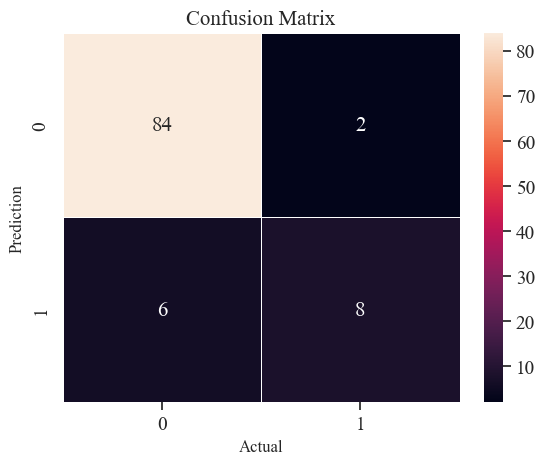

In [27]:
labels = yval.unique().tolist()
labels.sort()
#print(labels)

cm = confusion_matrix(yval.tolist(),pred_val)
#print(cm)

ax = sb.heatmap(cm, annot=True, fmt='g', xticklabels=labels, yticklabels=labels, linewidth=0.5)
ax.xaxis.tick_bottom()

plt.ylabel('Prediction',fontsize=12)
plt.xlabel('Actual',fontsize=12)
plt.title('Confusion Matrix',fontsize=15)
plt.show()

In [28]:
#lst = [yhat_val[x][0] for x in range(0,100)]